In [1]:
# import sys
# !{sys.executable} -m pip install pyjanitor
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor

tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
def plot_single_variable(x,y,model_type,model_name,feature_name):
    y = model_type[model_name].predict(test_labels)
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y,'.', color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel('THICKNESS')
    plt.legend()
    plt.plot()

In [145]:
# set definitions
T,TT,TTT = gl.data_loader()
# ,TT,TTT,TTTx,TTT_full
T_t = T.head()
gl.thickness_renamer(T)
gl.thickness_renamer(TT)

LR = np.logspace(-3,2,6)
VS = 0.2
Epochs = 500

glathida_list = TT,T
# ,TTT,TTTx

T.name = 'T'
T_t.name = 'T_t'
TT.name = 'TT'
# TTT.name = 'TTT'
# TTTx.name = 'TTTx'
# TTT_full.name = 'TTT_full'
pth_model = '/home/sa42/notebooks/glac/saved_models/'
pth_res = '/home/sa42/notebooks/glac/saved_results/'

Importing data...
Importing T database
Importing TT database
Importing TTT database
Import complete


In [146]:
vs = 0.2
epochs = 500

# load models
linear_model = {}
dnn_model = {}
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
            pth_model 
            + dataset.name 
            + '_linear_' 
            + variable_name 
            + '_' 
            + str(lr)
            + '_'
            + str(vs)
            + '_'
            + str(epochs)
            )
            
            linear_model[
                dataset.name 
                + '_' 
                + variable_name 
                + '_' 
                + str(lr)
            ] = tf.keras.models.load_model(file_name)
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
            pth_model 
            + dataset.name 
            + '_dnn_' 
            + variable_name 
            + '_' 
            + str(lr)
            + '_'
            + str(vs)
            + '_'
            + str(epochs)
            )
            
            dnn_model[
                dataset.name 
                + '_' 
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ] = tf.keras.models.load_model(file_name)
print('Models loaded')


# load histories
linear_history = {}
dnn_history = {}
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
                pth_res 
                + dataset.name 
                +'_linear_history_'
                + variable_name 
                + '_' + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            )
            
            linear_history[
                dataset.name 
                +'_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ]= pd.read_csv(file_name)

for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
                pth_res 
                + dataset.name 
                +'_dnn_history_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            )
            
            dnn_history[
                dataset.name 
                +'_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ] = pd.read_csv(file_name)
print('Histories loaded')

Models loaded
Histories loaded


In [170]:
loss = {}
for dataset in glathida_list:
    loss[dataset.name] = pd.DataFrame()
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for lr in LR:
        file = (
        dataset.name
        +'_'
        + 'MULTI'
        + '_' 
        + str(lr)
        + '_'
        + str(vs)
        + '_'
        + str(epochs))

        m_loss = dnn_history[file].min()
        m_loss['Name'] = file
        loss[dataset.name] = loss[dataset.name].append(m_loss,ignore_index=True)
#         loss[dataset.name] = loss[dataset.name].rename(columns = {
#             'loss':'loss_minimum',
#             'val_loss':'val_loss_minimum'
#         },inplace=True)
        loss[dataset.name].drop('Unnamed: 0',axis=1)

        f = dnn_history[file].last_valid_index()
        f_loss = dnn_history[file].iloc[[f]]
        f_loss['Name'] = file
        loss[dataset.name] = loss[dataset.name].append(f_loss,ignore_index=True)
                                                       
        loss[dataset.name].drop('Unnamed: 0',axis=1)
        fin_loss.rename(columns = {
            'loss':'loss_final',
            'val_loss':'val_loss_final'
    },inplace=True)

 #     min_loss = min_loss.drop('Unnamed: 0',axis=1)


#     fin_loss.rename(columns = {
#         'loss':'loss_final',
#         'val_loss':'val_loss_final'
#     },inplace=True)

#     min_loss.rename(columns = {
#         'loss':'loss_minimum',
#         'val_loss':'val_loss_minimum'
#     },inplace=True)
    
#     loss = pd.merge(min_loss, fin_loss)
#     loss.name = dataset.name
#     f = (dataset.name + '_loss')
#     str(dataset.name + '_loss') = pd.merge(min_loss, fin_loss)
print('Results compiled')

Results compiled


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [171]:
loss['T']

,Unnamed: 0,loss,val_loss,Name
0,0.0,12.380855,19.397886,T_MULTI_0.001_0.2_500
1,499.0,12.380855,19.417747,T_MULTI_0.001_0.2_500
2,0.0,9.676462,14.628198,T_MULTI_0.01_0.2_500
3,499.0,9.734937,14.947636,T_MULTI_0.01_0.2_500
4,0.0,8.469094,9.166418,T_MULTI_0.1_0.2_500
5,499.0,9.557596,10.334680,T_MULTI_0.1_0.2_500
6,0.0,12.360871,16.519909,T_MULTI_1.0_0.2_500
7,499.0,16.625563,21.061749,T_MULTI_1.0_0.2_500
8,0.0,19.584131,405.880493,T_MULTI_10.0_0.2_500
9,499.0,20.206484,878.261292,T_MULTI_10.0_0.2_500


KeyError: 'T'

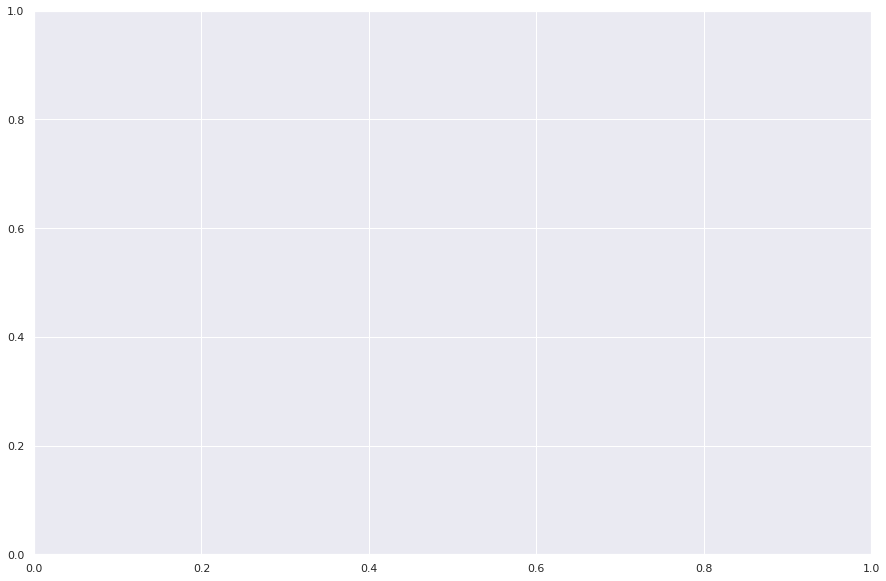

In [133]:
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
loss['T'].plot(x='Name', y = 'loss_minimum', kind='line', color = 'blue', ax=ax)
loss.plot(x='Name', y = 'val_loss_minimum', kind='line',color = 'green', ax=ax)
loss.plot(x='Name', y = 'loss_final', kind='line', color = 'red', ax=ax)
loss.plot(x='Name', y = 'val_loss_final', kind='line',color = 'orange', ax=ax)
ax.set_ylim([0,30])
ax.set_title('Prethicktor parameters for "T" model')
plt.show()
plt.tight_layout()


In [70]:
cccombo_breaker()

NameError: name 'cccombo_breaker' is not defined

(0.0, 300.0)

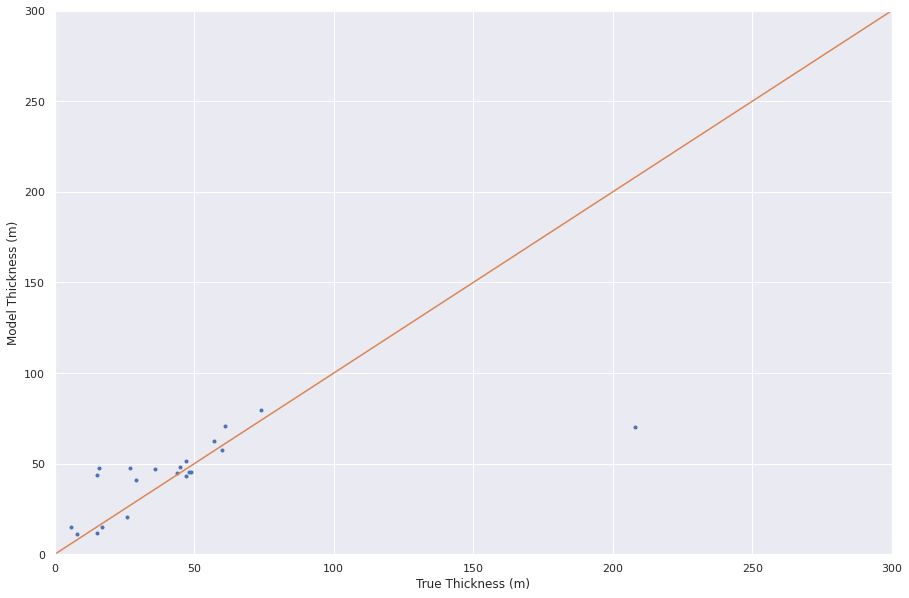

In [71]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(T)
y = dnn_model['T_MULTI_0.01_0.2_500'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

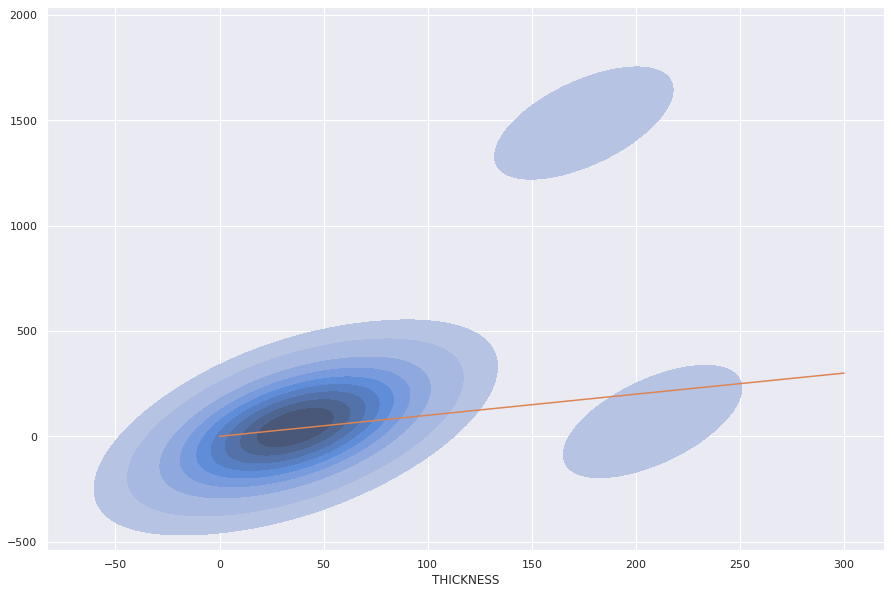

In [72]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

KeyError: 'T_LAT'

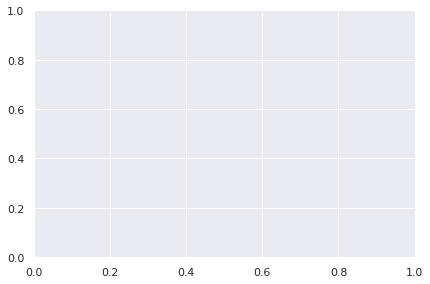

In [73]:
x = test_labels
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    plot_single_variable(x,y,dnn_model,'T_'+variable_name,variable_name)
#     ax.set_ylim([35,140])
#     ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

KeyError: 'T_LAT'

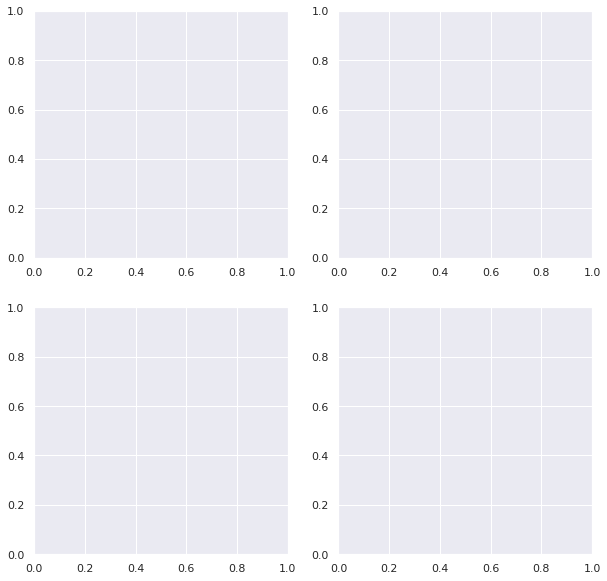

In [74]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['T_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['T_'+ variable_name])
#     ax.set_ylim([35,140])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
dnn_history

KeyError: 'T_AREA100.0'

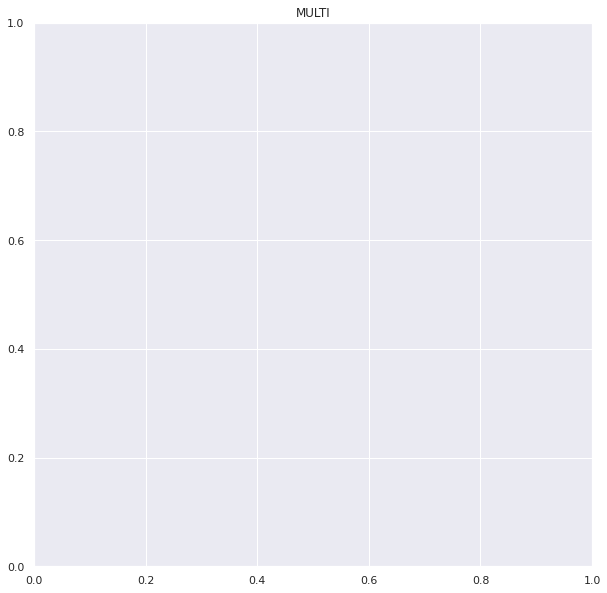

In [75]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['T_AREA100.0'])
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

KeyError: 'T_MULTI'

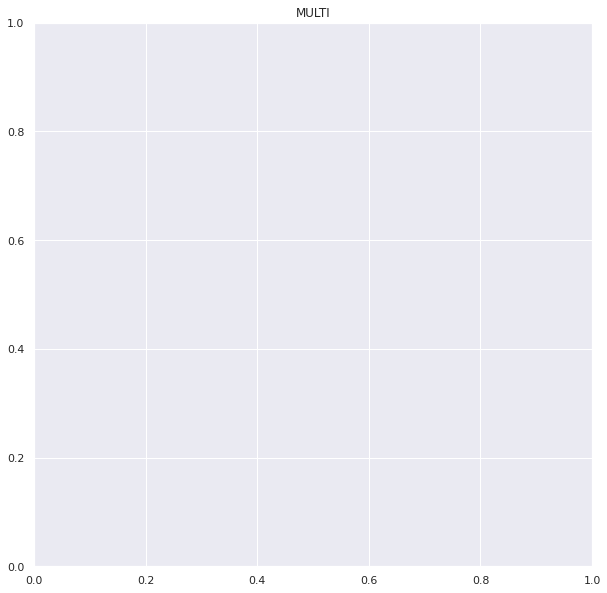

In [76]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['T_MULTI'])
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [77]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TT)
y = dnn_model['TT_MULTI'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
# plt.xlim((0,300))
# plt.ylim((0,300))
plt.xscale('log')
plt.yscale('log')

KeyError: 'TT_MULTI'

In [78]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

ValueError: array length 22 does not match index length 79

KeyError: 'TT_LOWER_BOUND'

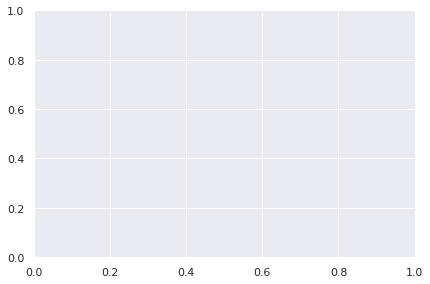

In [79]:
x = test_labels
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    plot_single_variable(x,y,dnn_model,'TT_'+variable_name,variable_name)
#     ax.set_ylim([35,140])
#     ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

KeyError: 'TT_LOWER_BOUND'

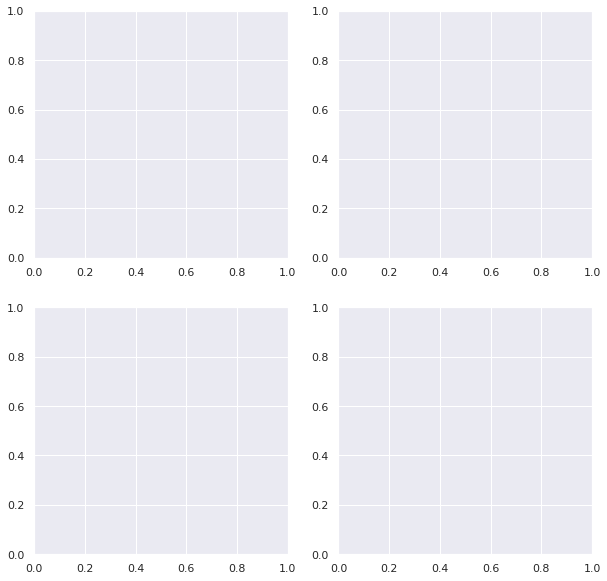

In [80]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['TT_'+ variable_name])
#     ax.set_ylim([20,45])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['TT_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTT)
y = dnn_model['TTT_MULTI'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,1300),(0,1300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,1300))
plt.ylim((0,1300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,1300),(0,1300),'-')

In [ ]:

fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['TTT_'+ variable_name])
    ax.set_ylim([152,165])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['TTT_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTTx)
y = dnn_model['TTTx_MULTI'].predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(3,3,i+1)
    gl.plot_loss(dnn_history['TTTx_'+ variable_name])
    ax.set_ylim([30,40])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('TTTx_MULTI')
gl.plot_loss(dnn_history['TTTx_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTT_full)
y = dnn_model['TTT_full_MULTI'].predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(6,6,i+1)
    gl.plot_loss(dnn_history['TTT_full_'+ variable_name])
#     ax.set_ylim([30,40])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('TTT_full_MULTI')
gl.plot_loss(dnn_history['TTT_full_MULTI'])

In [ ]:
LR = np.logspace(-3,2,6)
